# <center> <font style="color:rgb(100,109,254)">  Pyramid Blending  </font> </center>

## <font style="color:rgb(134,19,348)"> Image Blending with Pyramids  </font>

One Interesting application of Pyramids is Image Blending. With pyramid blending you get a seamless blending of images. This is unlike normal image stitching in which you just stitch one image with the other. One popular example of pyramid blending is blending of two fruits, Orange and Apple. 

Below you can see the results of normal stitching vs Blending.

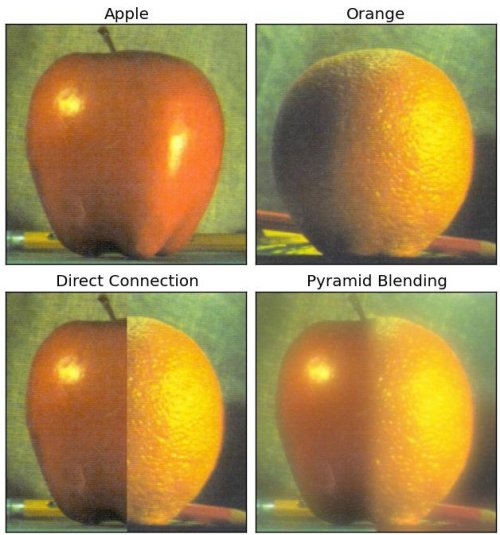

1. Load the two images of apple and orange
2. Find the Gaussian Pyramids for apple and orange (in this particular example, number of levels is 6)
3. From Gaussian Pyramids, find their Laplacian Pyramids
4. Now join the left half of apple and right half of orange in each levels of Laplacian Pyramids
5. Finally from this joint image pyramids, reconstruct the original image.


Consider the whole process like you first split the 2 images in various pieces and then merge those pieces at each level. Just like you merge 2 card decks together.


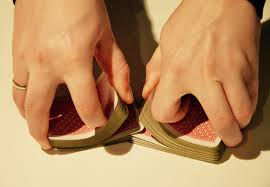

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)"> Alignment Correction</font>
The images of apple and orange we have are not properly aligned so first we will align them.

True

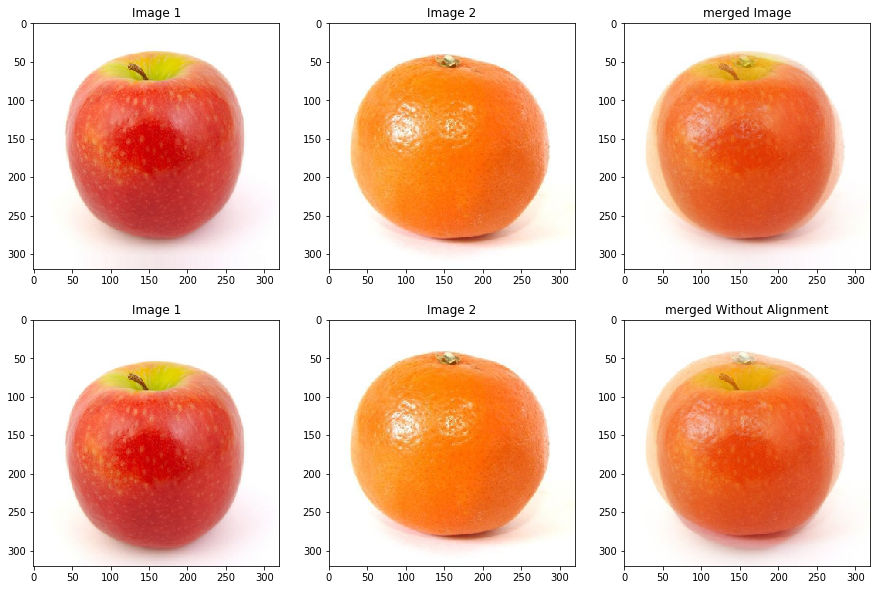

In [3]:
# resize both of them to have the same size
img = cv2.resize(cv2.imread('media/M4/apple.jpg',1), (320, 320))
img2 =cv2.resize(cv2.imread('media/M4/orange.jpg',1), (320, 320))

rows,cols,chan = img.shape

# through trial an error or by just estimating the required translation you can come up with the approx number for translation
M = np.float32([[1,0,0],[0,1,-17]])

# apply translation
dst = cv2.warpAffine(img,M,(cols,rows),borderMode=1)

# do a weighted merge just for visualization so we can see that they are aligned
merged= cv2.addWeighted(dst,0.5,img2,0.5,0)

# optionally do a merege on non alligned image to show the difference
merged_without_alignment= cv2.addWeighted(img,0.5,img2,0.5,0)


plt.figure(figsize=[15,10])
plt.subplot(231);plt.imshow(dst[:,:,::-1]);plt.title("Image 1");
plt.subplot(232);plt.imshow(img2[:,:,::-1]);plt.title("Image 2");
plt.subplot(233);plt.imshow(merged[:,:,::-1]);plt.title("merged Image");  
plt.subplot(234);plt.imshow(img[:,:,::-1]);plt.title("Image 1");
plt.subplot(235);plt.imshow(img2[:,:,::-1]);plt.title("Image 2");
plt.subplot(236);plt.imshow(merged_without_alignment[:,:,::-1]);plt.title("merged Without Alignment");  

# finally save the aligned image
cv2.imwrite('media/M4/applem.jpg',dst)

## <font style="color:rgb(134,19,348)"> Pyramid Image Merging Application (step by step) </font>
Now lets go through this step by step, first resize them to be `320` as with this number can be divided `6` times (as we're going 6 levels down kinda like inception) by `2` without running into an odd number.

First lets create gaussian pyramids of Image `A`

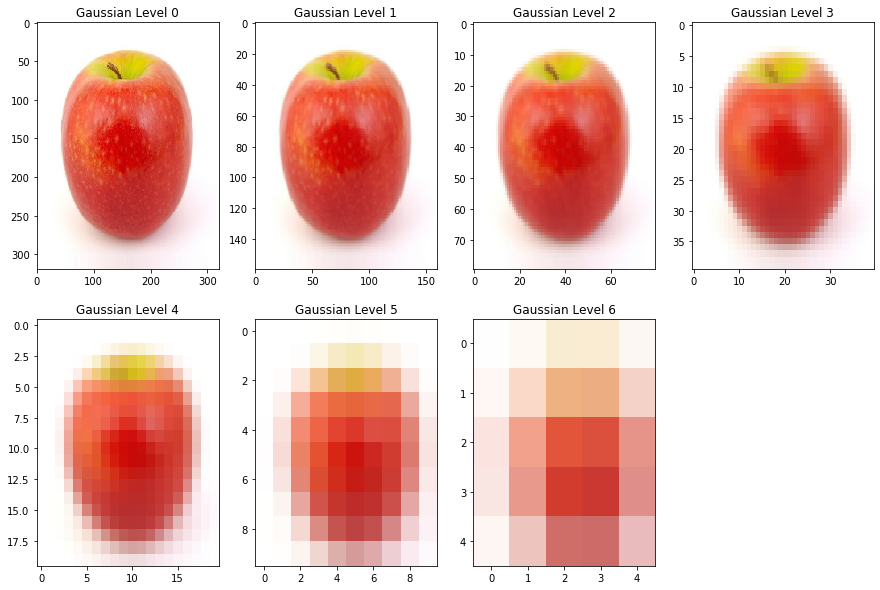

In [4]:
A = cv2.imread('media/M4/applem.jpg')
B = cv2.imread('media/M4/orange.jpg')

A = cv2.resize(A, (320, 320))
B = cv2.resize(B, (320, 320))

G = A.copy()

# the list gpA will hold gaussian pyramids for A
gpA = [G]

# Now in a loop go 6 levels down and append the pyramid to gpA list 
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
    
# Show the pyramids to the user (optional)
plt.figure(figsize=[15,10])
for x in range(len(gpA)):
    plt.subplot(2,4,x+1);plt.imshow(gpA[x][:,:,::-1],aspect='auto');plt.title("Gaussian Level {}".format(x));        

**Now lets create the gaussin pyramids for image `B`**

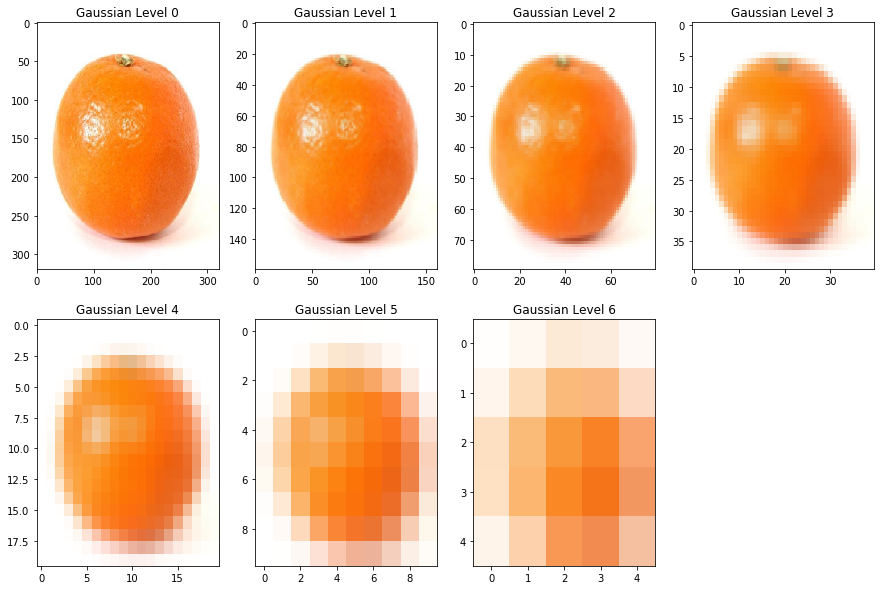

In [5]:
G = B.copy()

# the list gpB will hold gaussian pyramids for A
gpB = [G]

# Now in a loop go 6 levels down and append the pyramid to gpB list 
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
    
# Show the pyramids to the user (optional)
plt.figure(figsize=[15,10])
for x in range(len(gpA)):
    plt.subplot(2,4,x+1);plt.imshow(gpB[x][:,:,::-1],aspect='auto');plt.title("Gaussian Level {}".format(x));        

**Make Laplacian Pyramids for Image `A`**

**Note:** Just for displaying the laplacian pyramids, I have increased the contrast. Its not required.


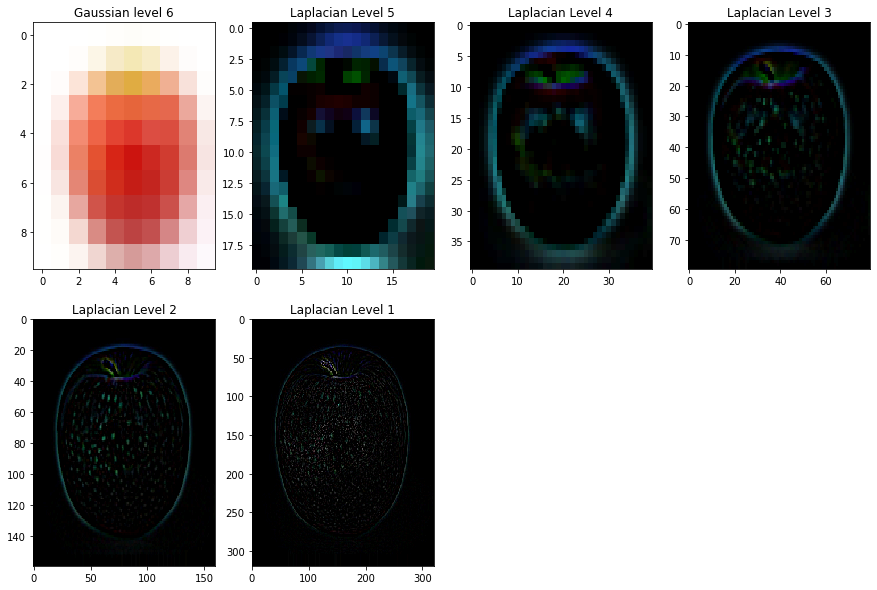

In [6]:
# The list lpA will hold laplacian pyramids for image A, also contain the last gaussian pyramid as first elelment
lpA = [gpA[5]]

# We start from 5 and go to 0, by decrementing 1 at every step
# the method to create this laplacian is same as described previously, here we are making a laplacian pyramid for every level.
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# Show all the laplacian pyramids (optional)
plt.figure(figsize=[15,10])
for x in range(len(lpA)):
    if x == 0:
        plt.subplot(2,4,x+1);plt.imshow(lpA[x][:,:,::-1],aspect='auto');plt.title("Gaussian level {}".format(len(gpA) -1));    
    else:
        # I'm aslo optionally increasing the contrast so you can see the pyramids clearly (just for visualization)
        plt.subplot(2,4,x+1);plt.imshow(np.uint8(np.clip(lpA[x]*4.0, 0, 255))[:,:,::-1],aspect='auto');
        plt.title("Laplacian Level {}".format(len(lpA)-x)); 

**Make Laplacian Pyramids for Image `B`**

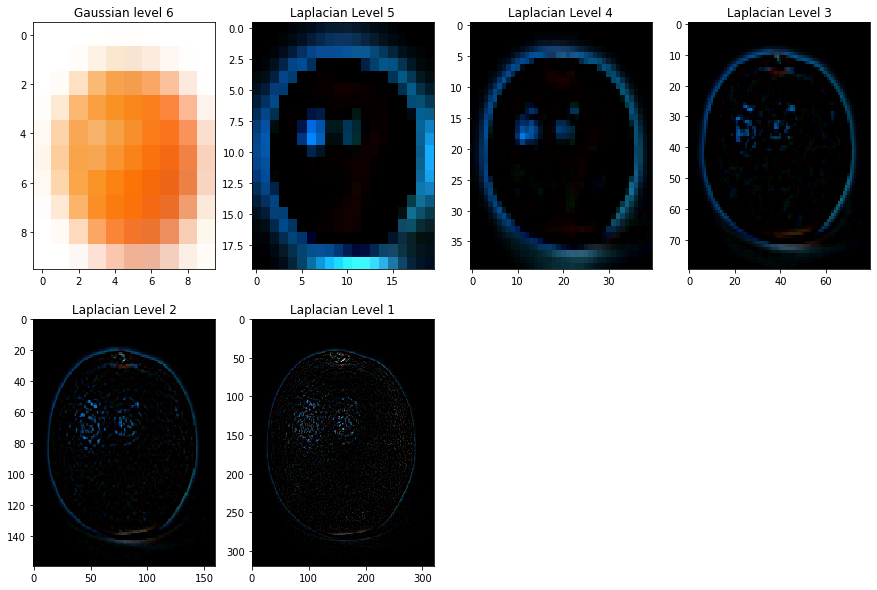

In [7]:
# The list lpB will hold laplacian pyramids for image B, also contain the last gaussian pyramid as first elelment
lpB = [gpB[5]]

# We start from 5 and go to 0, by decrementing 1 at every step
# the method to create this laplacian is same as described previously, here we are making a laplacian pyramid for every level.
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)  
    
# Show all the laplacian pyramids (optional)    
plt.figure(figsize=[15,10])

for x in range(len(lpB)):
     if x == 0:
        plt.subplot(2,4,x+1);plt.imshow(lpB[x][:,:,::-1],aspect='auto');plt.title("Gaussian level {}".format(len(gpB) -1));    
     else:
        plt.subplot(2,4,x+1);plt.imshow(np.uint8(np.clip(lpB[x]*4.0, 0, 255))[:,:,::-1],aspect='auto');
        plt.title("Laplacian Level {}".format(len(lpB) - x));

**Add left and right Halves of both images at each level of laplacian pyramids**

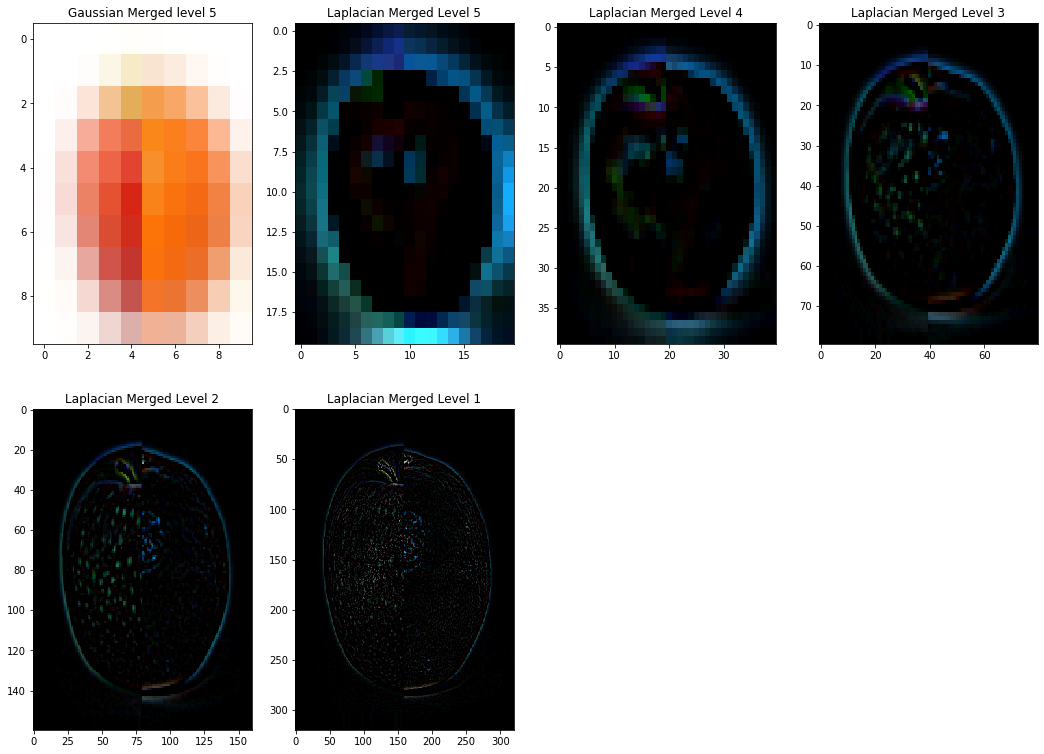

In [8]:
# Store the merged halves in the list LS
LS = []

for la,lb in zip(lpA,lpB):
    rows,cols, _ = la.shape
    
    # we are taking the left half of image A and right half of image B and then stacking them horizontally.
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))      
    
    LS.append(ls)
    
# Show all the merged laplacian pyramids (optional)    
plt.figure(figsize=[18,13])

for x in range(len(LS)):
    if x == 0:
        plt.subplot(2,4,x+1);plt.imshow(LS[x][:,:,::-1],aspect='auto');
        plt.title("Gaussian Merged level {}".format(len(lpA) -1));    
    else:
        plt.subplot(2,4,x+1);plt.imshow(np.uint8(np.clip(LS[x]*4.0, 0, 255))[:,:,::-1],aspect='auto');
        plt.title("Laplacian Merged Level {}".format(len(LS)- x));        

**Now in this final step we start from the merged gaussian at the last level and then pyrup and inject merged laplacian at each level**

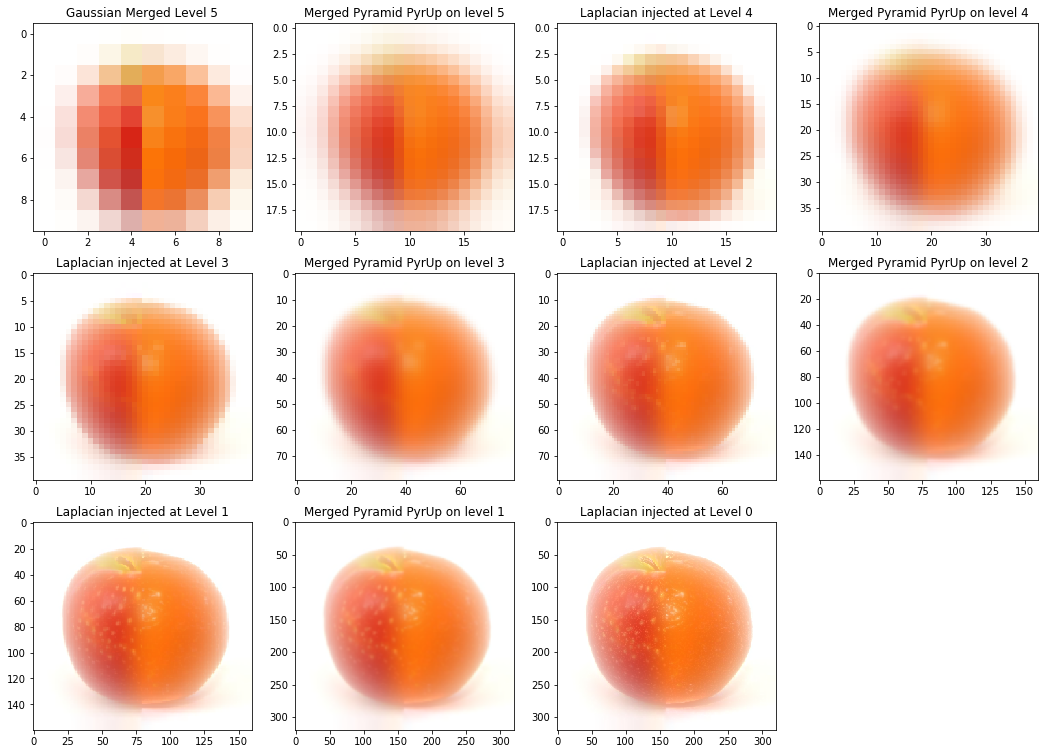

In [9]:
ls_ = LS[0]

plt.figure(figsize=[18,13])
plt.subplot(3,4,1);plt.imshow(ls_[:,:,::-1],aspect='auto');plt.title("Gaussian Merged Level {}".format(len(lpA) -1)); 

# ignore this python generator, this is just for plotting
def gennumbers():
    x = 1
    for i in range(10):
        x += 1
        yield x        
y = gennumbers()

for x in range(1,6):
    # pyrUp the previous merge before injecting laplacian
    ls_ = cv2.pyrUp(ls_)
   
    plt.subplot(3,4,next(y));plt.imshow(ls_[:,:,::-1],aspect='auto');
    plt.title("Merged Pyramid PyrUp on level {}".format(len(lpA) - x)); 
    
    # injecting merged laplacian to the previous pyramid
    ls_ = cv2.add(ls_, LS[x])
    
    plt.subplot(3,4,next(y));plt.imshow(ls_[:,:,::-1],aspect='auto');
    plt.title("Laplacian injected at Level {}".format(len(lpA) -x -1));


## <font style="color:rgb(134,19,348)">Wrapper Function for Pyramid Blending  </font>
Now lets put all the code in a single function so we do image blending in a single line of code. We also have an optional visualization option.

In [10]:
def warper(A,B,vis = False):    
    A = cv2.resize(A, (384, 384))
    B = cv2.resize(B, (384, 384))
    
    G = A.copy()
    gpA = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpA.append(G)

    G = B.copy()
    gpB = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpB.append(G)
        
    lpA = [gpA[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpA[i])
        L = cv2.subtract(gpA[i-1],GE)
        lpA.append(L)

    lpB = [gpB[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpB[i])
        L = cv2.subtract(gpB[i-1],GE)
        lpB.append(L)  

    LS = []
    for la,lb in zip(lpA,lpB):
        rows,cols,dpt = la.shape
        #ls = cv2.addWeighted(la,0.1,lb,0.7,0)
        ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
        LS.append(ls)
    
    if not vis:
        ls_ = LS[0]
        for i in range(1,6):
            ls_ = cv2.pyrUp(ls_)
            ls_ = cv2.add(ls_, LS[i])
            
    else:
        ls_ = LS[0]
        plt.figure(figsize=[18,13])
        plt.subplot(3,4,1);plt.imshow(ls_[:,:,::-1],aspect='auto');plt.title("Gaussian Merged Level {}".format(len(lpA) -1)); 

        def gennumbers():
            x = 1
            for i in range(10):
                x += 1
                yield x        
        y = gennumbers()

        for x in range(1,6):
            ls_ = cv2.pyrUp(ls_)
            plt.subplot(3,4,next(y));plt.imshow(ls_[:,:,::-1],aspect='auto');
            plt.title("Merged Pyramid PyrUp at level {}".format(len(lpA) - x)); 

            ls_ = cv2.add(ls_, LS[x])
            plt.subplot(3,4,next(y));plt.imshow(ls_[:,:,::-1],aspect='auto');
            plt.title("Laplacian injected at Level {}".format(len(lpA) -x));        
        
    return ls_    

### Test our Wrapper Function<font style="color:rgb(34,169,34)">  </font>

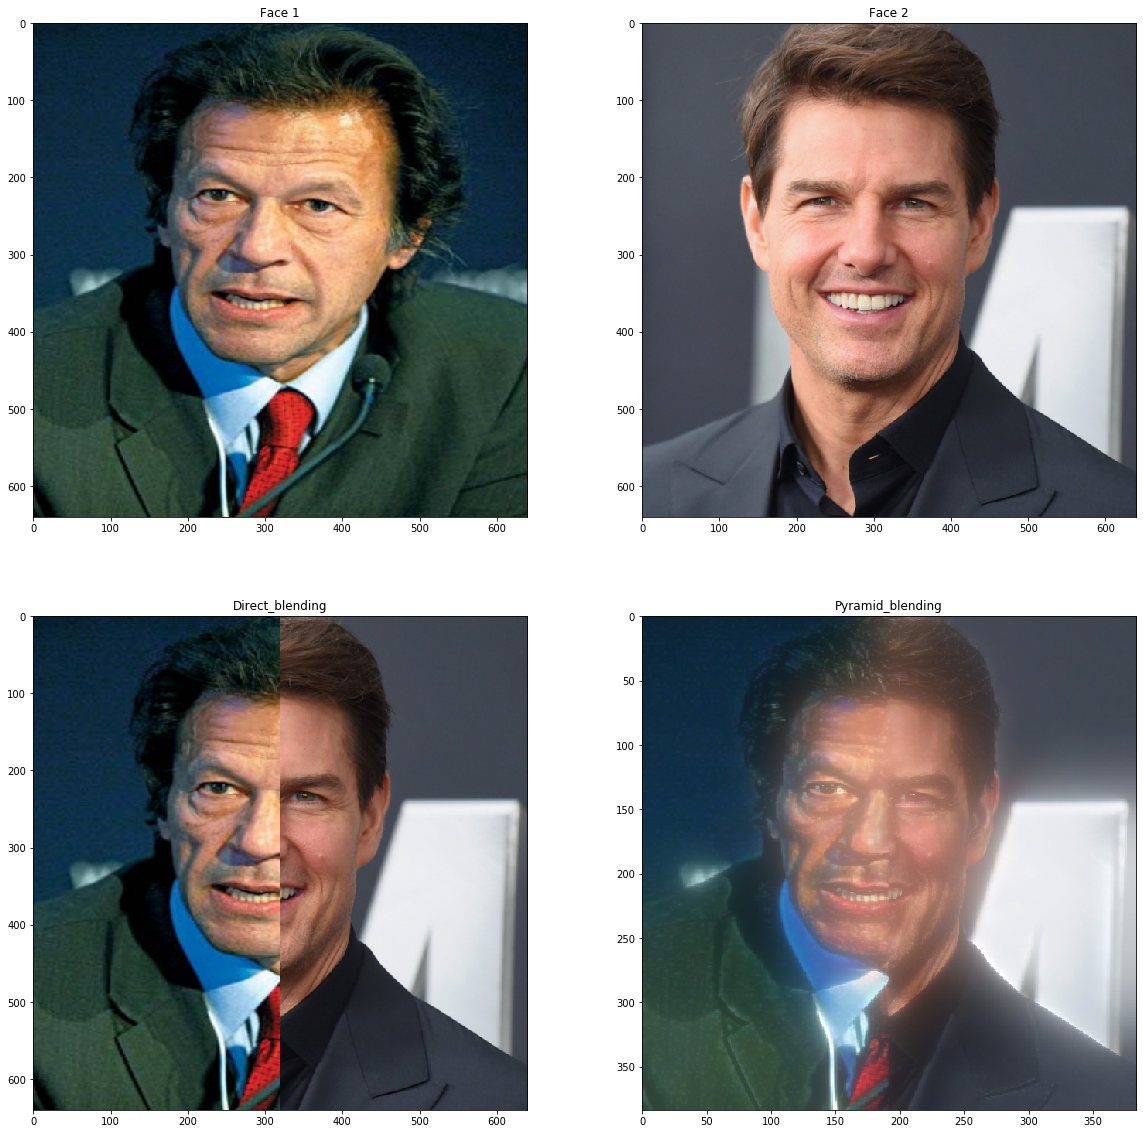

In [11]:
face1 = cv2.imread('media/M4/imrankhanface1.jpg')
face2 = cv2.imread('media/M4/tomface1.jpg')

combined = warper(face1,face2)

# just for the sake of showing, also doing direct blending
face1 = cv2.resize(face1, (640, 640))
face2 = cv2.resize(face2, (640, 640))
rows,cols = face1.shape[:2]
real = np.hstack((face1[:,:int(cols/2)],face2[:,int(cols/2):]))

plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(face1[:,:,::-1]);plt.title("Face 1");
plt.subplot(222);plt.imshow(face2[:,:,::-1]);plt.title("Face 2");
plt.subplot(223);plt.imshow(real[:,:,::-1]);plt.title("Direct_blending");
plt.subplot(224);plt.imshow(combined[:,:,::-1]);plt.title("Pyramid_blending");

**We can also see the blending step by step by enabling vis flag to True**

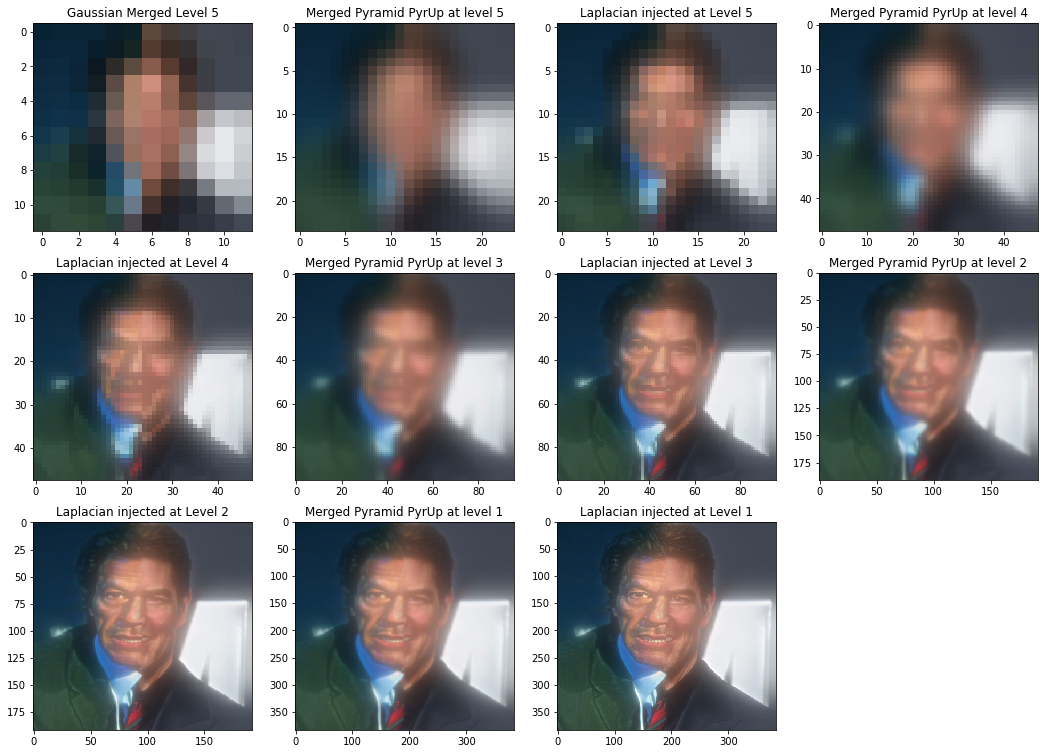

In [12]:
combined = warper(face1,face2,vis=True)

###  <font style="color:rgb(34,169,134)"> Assignment: Face Detection & Merging </font>
Make a program which takes two images and then performs face detection and merges those faces.

In [ ]:
### ADD CODE HERE

